In [23]:
import geopandas as gpd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm
import seaborn as sns
from tqdm import tqdm
import numpy as np
import pandas as pd
import shapely
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import img_tiles

# I/O

In [41]:
pth_bogard_lakes = '/Volumes/metis/ABOVE3/LAKESHAPE/bogard_map_lakes.shp'
pth_efflux_lakes = '/Volumes/metis/ABOVE3/LAKESHAPE/effluxlakes.shp'
pth_above3_lakes = '/Volumes/thebe/ABoVE2021/Mapping/ABOVE_coordinates_for_Ethan_10-19-21-mod-v2.csv'

In [51]:
def csv2gdf(pth, x_field, y_field, crs, **kwargs):
    df = pd.read_csv(pth)
    return gpd.GeoDataFrame(
        df, crs=crs, geometry=shapely.points(df[x_field], df[y_field]), **kwargs)

In [52]:
gdf_bogard_lakes = gpd.read_file(pth_bogard_lakes, engine='pyogrio')
gdf_efflux_lakes = gpd.read_file(pth_efflux_lakes, engine='pyogrio')
gdf_above3_lakes = csv2gdf(pth_above3_lakes, 'longitude', 'latitude', 'EPSG:4326')

# Plots

In [9]:
df_unq_sites = pd.read_feather(
    '/Volumes/metis/ABOVE3/Aquasat/unique_site_inventory.feather')
df_unq_sites

,SiteID,epsg,lat,long,source
0,11NPSWRD_WQX-PUHO_F_01_AP,4326.0,19.421520,-155.910580,WQP
1,11NPSWRD_WQX-PUHO_F_02_AP,4326.0,19.421520,-155.910580,WQP
2,11NPSWRD_WQX-PUHO_F_03_AP,4326.0,19.421520,-155.910580,WQP
3,11NPSWRD_WQX-PUHO_F_04_AP,4326.0,19.421520,-155.910580,WQP
4,11NPSWRD_WQX-PUHO_F_05_AP,4326.0,19.421520,-155.910580,WQP
...,...,...,...,...,...
405533,21FLPBCH-67,4269.0,80.080555,-26.603611,WQP
405534,NALMS-1660,4269.0,81.045833,-81.045830,WQP
405535,NALMS-1669,4269.0,82.048333,-29.756389,WQP
405536,NALMS-2223,4269.0,87.332778,-41.634722,WQP


<Axes: >

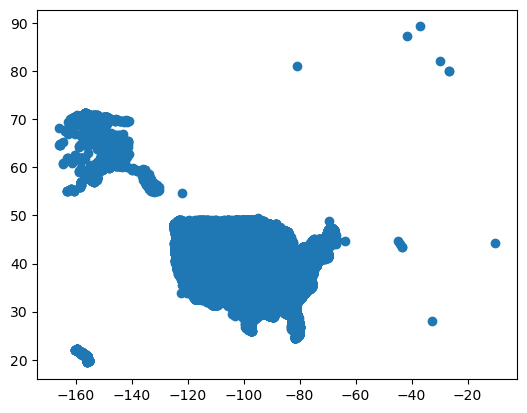

In [19]:
gdf_unq_sites = gpd.GeoDataFrame(
    df_unq_sites, crs='EPSG:4326', geometry=shapely.points(df_unq_sites.long, df_unq_sites.lat))
gdf_unq_sites.plot()

/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer

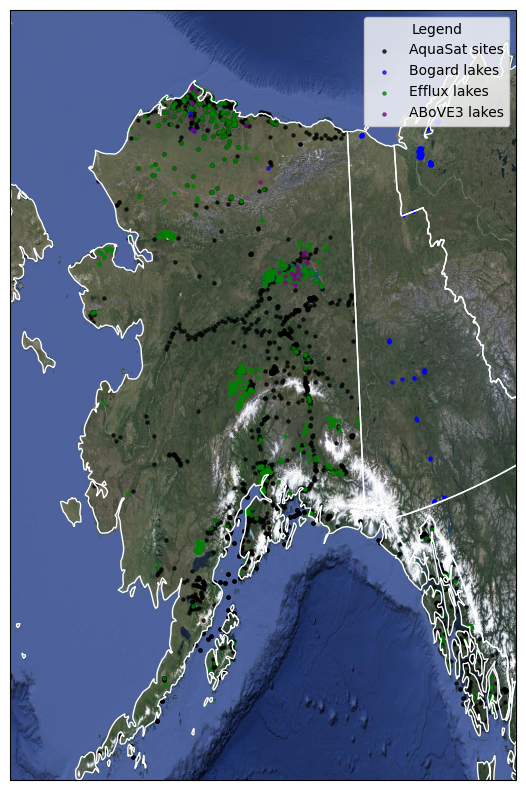

In [65]:
# Set up the plot with a specific Cartopy CRS for Alaska
fig, ax = plt.subplots(
    figsize=(7, 10), 
    subplot_kw={
    # 'projection': 'ESRI:102001'})
    'projection': ccrs.AlbersEqualArea(central_longitude=-152, central_latitude=63)})
        # 'projection': ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=40)})

# Zoom into Alaska
ax.set_extent([-170, -130, 54, 72], crs=ccrs.PlateCarree())

# Add Google Satellite imagery
ax.add_image(img_tiles.GoogleTiles(style='satellite'), 6)

# Add state outlines using Cartopy's features
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='white')

# Plot the GeoDataFrames
a=0.7
gdf_unq_sites.plot(ax=ax, marker='o', color='k', markersize=5,
                   transform=ccrs.PlateCarree(), alpha=a, label='AquaSat sites')  # Ensure transformation to PlateCarree
gdf_bogard_lakes.plot(ax=ax, marker='o', color='blue', markersize=5,
                   transform=ccrs.PlateCarree(), alpha=a, label='Bogard lakes')
gdf_efflux_lakes.plot(ax=ax, marker='o', color='green', markersize=5,
                   transform=ccrs.PlateCarree(), alpha=a, label='Efflux lakes')
gdf_above3_lakes.plot(ax=ax, marker='o', color='purple', markersize=5,
                      transform=ccrs.PlateCarree(), alpha=a, label='ABoVE3 lakes')
ax.legend(title='Legend', loc='upper right')
plt.show()

/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer

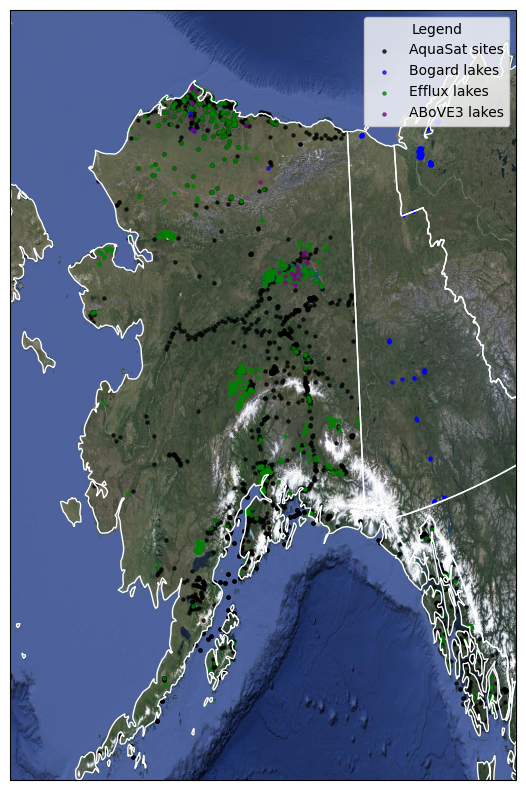

In [ ]:
# Set up the plot with a specific Cartopy CRS for Alaska
fig, ax = plt.subplots(
    figsize=(7, 10), 
    subplot_kw={
    # 'projection': 'ESRI:102001'})
    'projection': ccrs.AlbersEqualArea(central_longitude=-152, central_latitude=63)})
        # 'projection': ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=40)})

# Zoom into Alaska
ax.set_extent([-170, -107, 54, 72], crs=ccrs.PlateCarree())

# Add Google Satellite imagery
ax.add_image(img_tiles.GoogleTiles(style='satellite'), 6)

# Add state outlines using Cartopy's features
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='white')

# Plot the GeoDataFrames
a=0.7
gdf_unq_sites.plot(ax=ax, marker='o', color='k', markersize=5,
                   transform=ccrs.PlateCarree(), alpha=a, label='AquaSat sites')  # Ensure transformation to PlateCarree
gdf_bogard_lakes.plot(ax=ax, marker='o', color='blue', markersize=5,
                   transform=ccrs.PlateCarree(), alpha=a, label='Bogard lakes')
gdf_efflux_lakes.plot(ax=ax, marker='o', color='green', markersize=5,
                   transform=ccrs.PlateCarree(), alpha=a, label='Efflux lakes')
gdf_above3_lakes.plot(ax=ax, marker='o', color='purple', markersize=5,
                      transform=ccrs.PlateCarree(), alpha=a, label='ABoVE3 lakes')
ax.legend(title='Legend', loc='upper right')
plt.show()

In [10]:
df_sites = pd.read_feather(
    '/Volumes/metis/ABOVE3/Aquasat/wqp_inventory.feather')
df_sites

,Constituent,MonitoringLocationIdentifier,resultCount,MonitoringLocationName,MonitoringLocationTypeName,ResolvedMonitoringLocationTypeName,LatitudeMeasure,LongitudeMeasure,HorizontalCoordinateReferenceSystemDatumName,HUCEightDigitCode,CountryCode,StateCode,CountyCode,OrganizationFormalName
0,tss,USGS-15008000,114.0,SALMON R NR HYDER AK,Stream,Stream,56.025815,-130.066982,NAD83,19010106,US,02,198,USGS Alaska Water Science Center
1,tss,USGS-15011500,10.0,RED R NR METLAKATLA AK,Stream,Stream,55.141056,-130.532243,NAD83,19010105,US,02,130,USGS Alaska Water Science Center
2,tss,USGS-15011858,7.0,KETA R BL RED C NR KETCHIKAN AK,Stream,Stream,55.388015,-130.376694,NAD83,19010105,US,02,130,USGS Alaska Water Science Center
3,tss,USGS-15011860,7.0,KETA R AB HILL C NR KETCHIKAN AK,Stream,Stream,55.375791,-130.401139,NAD83,19010105,US,02,130,USGS Alaska Water Science Center
4,tss,USGS-15011865,10.0,HILL C AB WHITE C NR KETCHIKAN AK,Stream,Stream,55.420788,-130.451695,NAD83,19010105,US,02,130,USGS Alaska Water Science Center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499973,doc,WI_MMSD-UC-03S,240.0,124th and Bluemound (UPS),River/Stream,Stream,43.037000,-88.068000,WGS84,04040003,US,55,133,Milwaukee Metropolitan Sewerage District
499974,doc,WI_MMSD-UC-04S,240.0,116th and Greenfield (Southbranch of UC),River/Stream,Stream,43.016000,-88.058000,WGS84,04040003,US,55,079,Milwaukee Metropolitan Sewerage District
499975,doc,WI_MMSD-UC-05S,240.0,"Underwood Creek Pkwy, dwnst of Zoo discharge",River/Stream,Stream,43.030000,-88.067000,WGS84,04040003,US,55,133,Milwaukee Metropolitan Sewerage District
499976,doc,WI_MMSD-UC-06S,240.0,115th St. (south of Watertown Plank),River/Stream,Stream,43.043000,-88.056000,WGS84,04040003,US,55,079,Milwaukee Metropolitan Sewerage District


# Write out shapefiles

In [67]:
gdf_unq_sites.to_file(
    '/Volumes/metis/ABOVE3/Aquasat/shp/unique_site_inventory.shp', engine='pyogrio')
gdf_above3_lakes.to_file(
    '/Volumes/thebe/ABoVE2021/Mapping/shp/ABOVE_coordinates_for_Ethan_10-19-21-mod-v2.shp', engine='pyogrio')

/var/folders/rv/sn0kln2103b9fs4xl56n3w7w0000gn/T/ipykernel_6506/2176626272.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_above3_lakes.to_file(
